In [ ]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy, CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder,StandardScaler

## **Data Preparation**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TARP.csv", ",")
data.head()

<ipython-input-143-22a6940ff8f4>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TARP.csv", ",")


,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [ ]:
data.drop(['Temperature','Wind speed (Km/h)','Air humidity (%)','Wind gust (Km/h)','Pressure (KPa)','ph','rainfall','N','P','K'],axis=1,inplace=True)

In [ ]:
data

,Soil Moisture,Soil Humidity,Time,Air temperature (C),Status
0,54,70,21,19.52,ON
1,12,40,104,19.49,OFF
2,34,35,62,19.47,ON
3,7,44,93,19.54,OFF
4,50,23,92,19.61,OFF
...,...,...,...,...,...
99995,74,29,83,NaN,OFF
99996,58,46,82,NaN,OFF
99997,4,39,17,NaN,ON
99998,83,56,15,NaN,OFF


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

In [ ]:
data.shape

(100000, 15)

In [ ]:
data=data[['Soil Moisture','Air temperature (C)','Air humidity (%)','Time','Status']]


In [ ]:
data.head()

,Soil Moisture,Air temperature (C),Air humidity (%),Time,Status
0,54,19.52,55.04,21,ON
1,12,19.49,55.17,104,OFF
2,34,19.47,55.30,62,ON
3,7,19.54,54.20,93,OFF
4,50,19.61,53.09,92,OFF


In [ ]:
data.drop(data.index[2201:],inplace=True)

In [ ]:
data.corr()

,Soil Moisture,Air temperature (C),Air humidity (%),Time,Status
Soil Moisture,1.000000,0.000302,-0.007966,-0.012788,-0.315326
Air temperature (C),0.000302,1.000000,-0.855910,-0.016790,-0.002840
Air humidity (%),-0.007966,-0.855910,1.000000,0.019229,-0.011635
Time,-0.012788,-0.016790,0.019229,1.000000,-0.251719
Status,-0.315326,-0.002840,-0.011635,-0.251719,1.000000


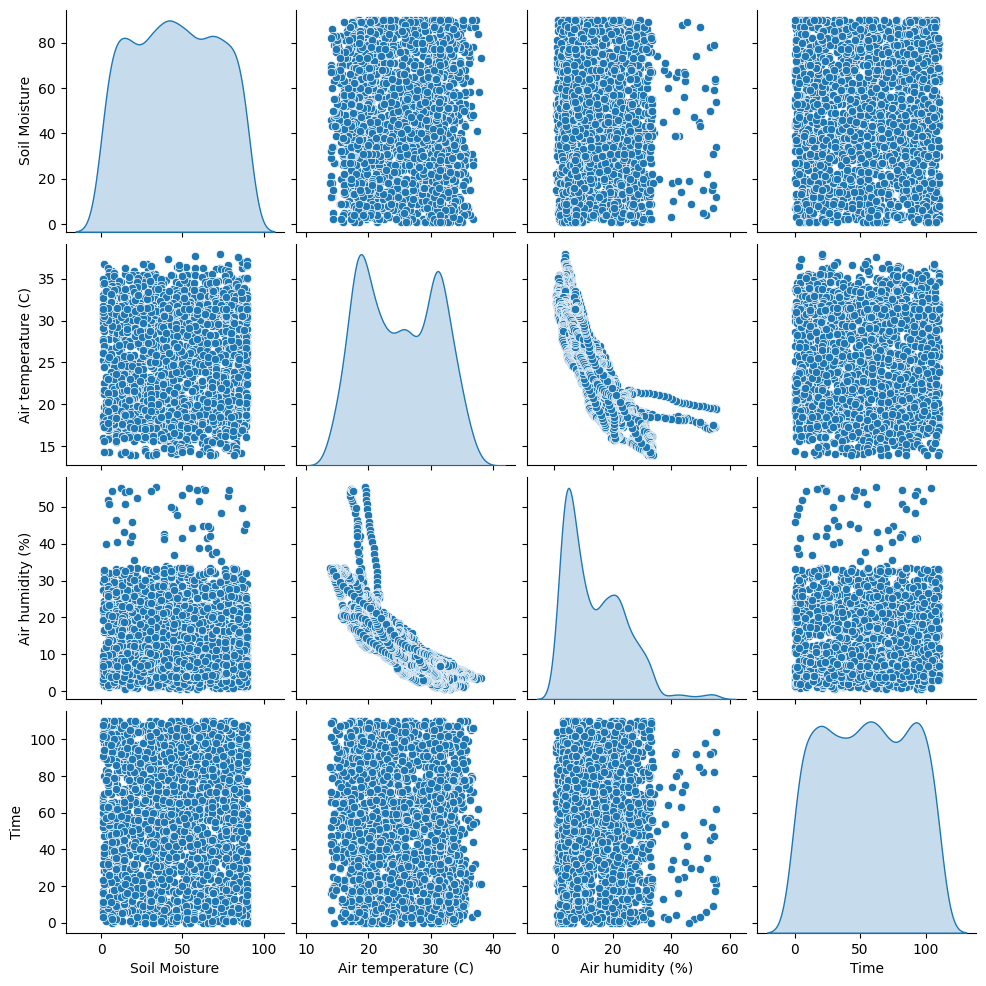

In [ ]:
sns.pairplot(data[['Soil Moisture','Air temperature (C)','Air humidity (%)','Time','Status']], diag_kind='kde')

In [ ]:
data.isnull().sum()

Soil Moisture          0
Air temperature (C)    0
Air humidity (%)       0
Time                   0
Status                 0
dtype: int64

In [ ]:
data["Status"].replace({"ON": 1, "OFF": 0}, inplace = True)

In [ ]:
data.head()

,Soil Moisture,Air temperature (C),Air humidity (%),Time,Status
0,54,19.52,55.04,21,1
1,12,19.49,55.17,104,0
2,34,19.47,55.30,62,1
3,7,19.54,54.20,93,0
4,50,19.61,53.09,92,0


In [ ]:
data=pd.DataFrame(data)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[ 54.    19.52  55.04  21.     1.  ]
 [ 12.    19.49  55.17 104.     0.  ]
 [ 34.    19.47  55.3   62.     1.  ]
 ...
 [ 10.    31.48   6.79  62.     1.  ]
 [ 70.    31.44   6.85  55.     1.  ]
 [  1.    31.41   6.91 102.     0.  ]], shape=(2201, 5), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[ 12.    24.82  18.26  44.     1.  ]
 [ 70.    27.32   9.06  39.     0.  ]
 [ 90.    30.44   3.14 101.     0.  ]
 [ 72.    23.3   17.46  39.     0.  ]
 [ 76.    16.17  32.38  11.     0.  ]], shape=(5, 5), dtype=float32)


In [ ]:
X = tensor_data[:,0:-1]
print(X[:5])

tf.Tensor(
[[ 12.    24.82  18.26  44.  ]
 [ 70.    27.32   9.06  39.  ]
 [ 90.    30.44   3.14 101.  ]
 [ 72.    23.3   17.46  39.  ]
 [ 76.    16.17  32.38  11.  ]], shape=(5, 4), dtype=float32)


In [ ]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


In [ ]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [ ]:
print(X.shape)

(2201, 4)


In [ ]:
y.shape

TensorShape([2201, 1])

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(1760, 4)
(1760, 1)


In [ ]:
y_train

<tf.Tensor: shape=(1760, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [ ]:
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

print(X_val.shape)
print(y_val.shape)

(220, 4)
(220, 1)


In [ ]:
print(y_val)

tf.Tensor(
[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(221, 4)
(221, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-1.2821332 , -0.04453836,  0.4290546 , -0.3416298 ],
       [ 0.9478156 ,  0.36610395, -0.4645705 , -0.49531266],
       [ 1.7167635 ,  0.87858564, -1.0395988 ,  1.4103549 ],
       [ 1.0247104 , -0.29420894,  0.35134792, -0.49531266],
       [ 1.1784999 , -1.4653606 ,  1.8005749 , -1.3559368 ]],
      dtype=float32)>

In [ ]:
print(X[:5])

tf.Tensor(
[[ 12.    24.82  18.26  44.  ]
 [ 70.    27.32   9.06  39.  ]
 [ 90.    30.44   3.14 101.  ]
 [ 72.    23.3   17.46  39.  ]
 [ 76.    16.17  32.38  11.  ]], shape=(5, 4), dtype=float32)


## **Model Creation and Training**

In [ ]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (4,)),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1,activation = "sigmoid"),
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               640       
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,793
Trainable params: 33,793
Non-trainable params: 0
_________________________________________________________________


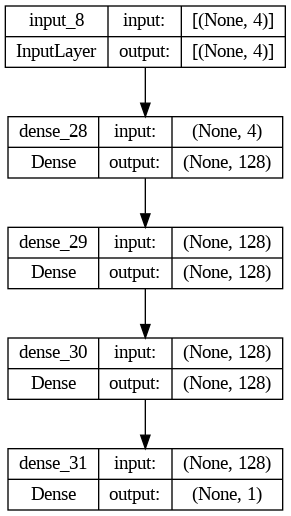

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [ ]:
loss_function = BinaryCrossentropy()
metrics = [CategoricalAccuracy(name = "accuracy")]

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01),
               loss = loss_function,
    metrics = metrics)

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 8, verbose = 1)

Epoch 1/8
55/55 [==============================] - 2s 7ms/step - loss: 1.1392 - accuracy: 1.0000 - val_loss: 0.5322 - val_accuracy: 1.0000
Epoch 2/8
55/55 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 1.0000 - val_loss: 0.5167 - val_accuracy: 1.0000
Epoch 3/8
55/55 [==============================] - 0s 6ms/step - loss: 0.5186 - accuracy: 1.0000 - val_loss: 0.4934 - val_accuracy: 1.0000
Epoch 4/8
55/55 [==============================] - 0s 7ms/step - loss: 0.5168 - accuracy: 1.0000 - val_loss: 0.4747 - val_accuracy: 1.0000
Epoch 5/8
55/55 [==============================] - 0s 6ms/step - loss: 0.4992 - accuracy: 1.0000 - val_loss: 0.4755 - val_accuracy: 1.0000
Epoch 6/8
55/55 [==============================] - 0s 6ms/step - loss: 0.4925 - accuracy: 1.0000 - val_loss: 0.4739 - val_accuracy: 1.0000
Epoch 7/8
55/55 [==============================] - 0s 6ms/step - loss: 0.4952 - accuracy: 1.0000 - val_loss: 0.4897 - val_accuracy: 1.0000
Epoch 8/8
55/55 [==========

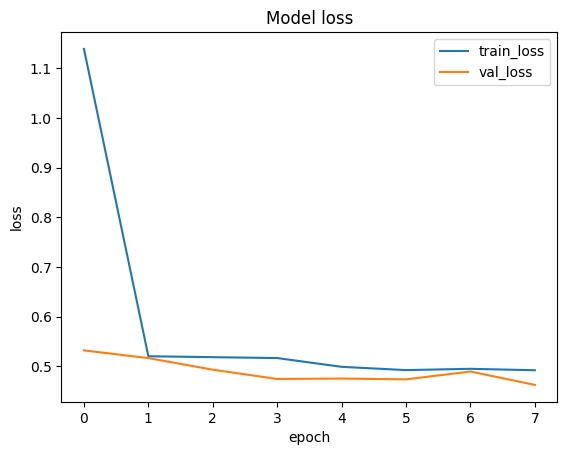

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

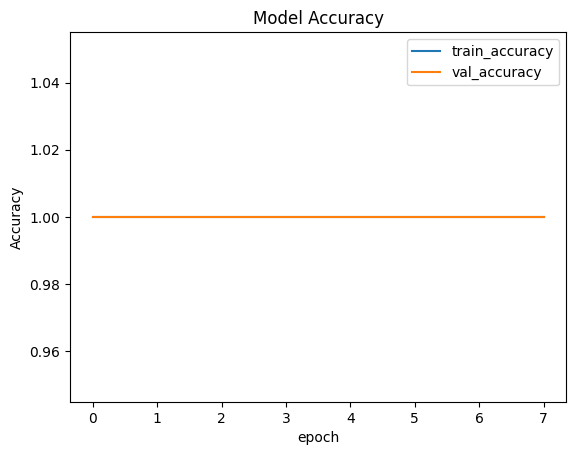

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

## **Model Evaluation and Testing**

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 1.0000


[0.291893869638443, 1.0]

In [ ]:
X_test.shape

TensorShape([221, 4])

In [ ]:
model.predict(tf.expand_dims(X_test[1], axis = 0 ))

1/1 [==============================] - 0s 27ms/step


array([[0.00649024]], dtype=float32)

In [ ]:
y_test[1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

313/313 [==============================] - 0s 1ms/step
[0.999783, 0.9901508, 1.2815492e-05, 0.48792905, 0.9993892, 0.28038773, 0.11950645, 0.9770815, 0.017570019, 0.4306382, 0.99971646, 0.97500604, 0.60452616, 0.33952442, 0.9776964, 0.9981686, 0.0028401928, 0.013256649, 0.26360402, 0.88202167, 0.8512608, 0.93896234, 0.00032234614, 0.9601983, 2.5365596e-05, 0.37167475, 0.07054527, 0.99982554, 0.24828556, 0.3758143, 5.9974973e-05, 0.24270238, 5.9579415e-05, 0.94357, 0.59913766, 0.5826615, 0.9034814, 0.9775882, 0.88484526, 0.531086, 0.00042376108, 0.9999523, 0.46644714, 0.5525503, 0.99979097, 0.7019877, 0.19776624, 0.7045623, 0.18016961, 1.8543895e-05, 0.035909194, 0.002500004, 0.42882073, 0.85190827, 0.022551574, 0.8220585, 0.8826834, 0.005007447, 0.30634618, 0.996259, 0.9335569, 0.847776, 0.2712222, 0.99480337, 0.114721365, 0.0018290702, 0.8327228, 0.78807586, 0.9709362, 0.0010056817, 0.47022873, 0.97415733, 0.13512573, 0.30610588, 0.24794178, 0.9501601, 0.07400751, 0.5011236, 0.9402765

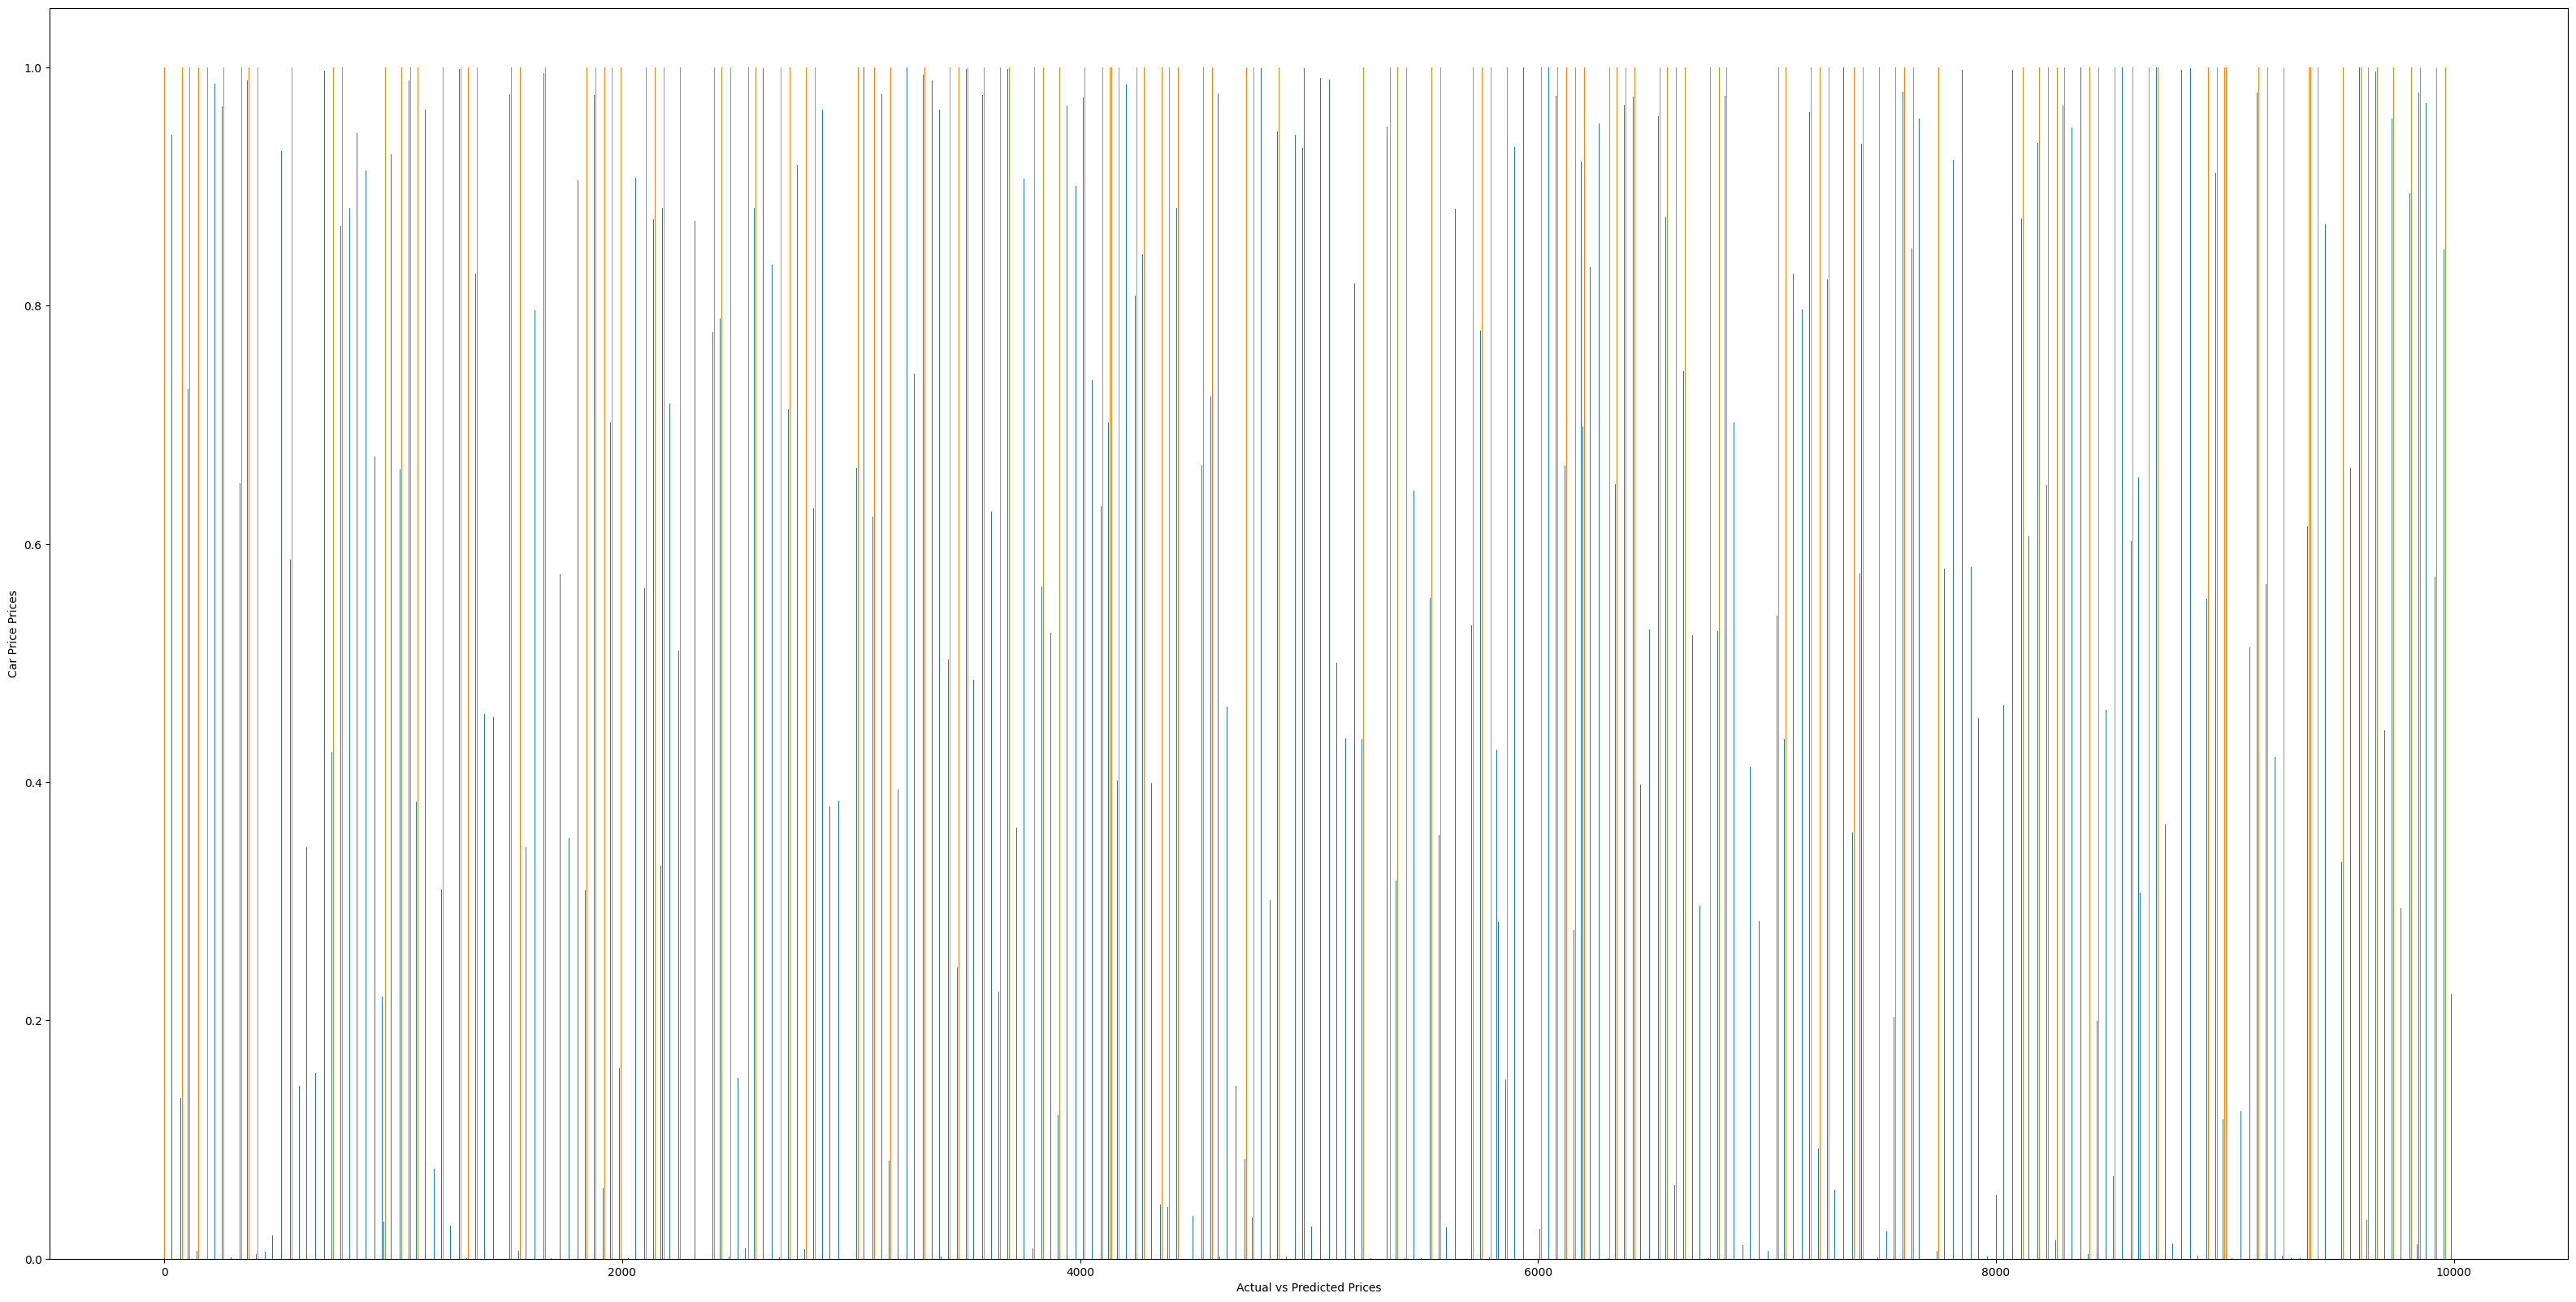

In [ ]:
ind = np.arange(10000)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

In [ ]:
model.save("Irrigation.h5")

In [ ]:
def representative_data_gen():
  for input_value, j in train_dataset.take(20):
    yield [input_value]

In [ ]:
 # Converting a tf.Keras model to a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimisations = [tf.lite.Optimize.DEFAULT]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32
converter.representative_dataset = representative_data_gen

In [ ]:
tflite_model = converter.convert() 

In [ ]:
import pathlib

In [ ]:
tflite_models_dir = pathlib.Path("/content/quantised_models/")
tflite_models_dir.mkdir(exist_ok=True,parents=True)

tflite_model_file = tflite_models_dir/"Irrigation_model.tflite"
tflite_model_file.write_bytes(tflite_model)

137708

## TFLITE RUNTIME

In [ ]:
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://google-coral.github.io/py-repo/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.8 MB/s eta 0:00:00


In [ ]:
import tflite_runtime.interpreter as tflite
import numpy as np

In [ ]:
test_data =np.array([54,19.52,55.04,21],dtype=np.float32)

In [ ]:
test_data =np.array([54,19.52,55.04,21],dtype=np.float32)
test_data = np.expand_dims(test_data, axis = 0)

interpreter = tflite.Interpreter(model_path="/content/quantised_models/Irrigation_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]



interpreter.set_tensor(input_details["index"], test_data)
interpreter.invoke()

output = interpreter.get_tensor(output_details["index"])[0]

print(output)


In [ ]:
print(output)

[0.6633699] tf.Tensor(0.0, shape=(), dtype=float32)
